# How to find the hardness of a given graph?

In [98]:
using GenericTensorNetworks
using BloqadeMIS
using Bloqade

In [99]:
function get_hardness(G)
    problem = IndependentSet(G; optimizer=TreeSA())
    Dmax = GenericTensorNetworks.solve(problem, CountingMax(2))[].coeffs[2]
    Dsecond = GenericTensorNetworks.solve(problem, CountingMax(2))[].coeffs[1]
    MIS = GenericTensorNetworks.solve(problem, SizeMax())[].n
    hp = (Dsecond / (MIS * Dmax))
    return hp
end

get_hardness (generic function with 1 method)

## Generate graphs and evaluating their hardness 

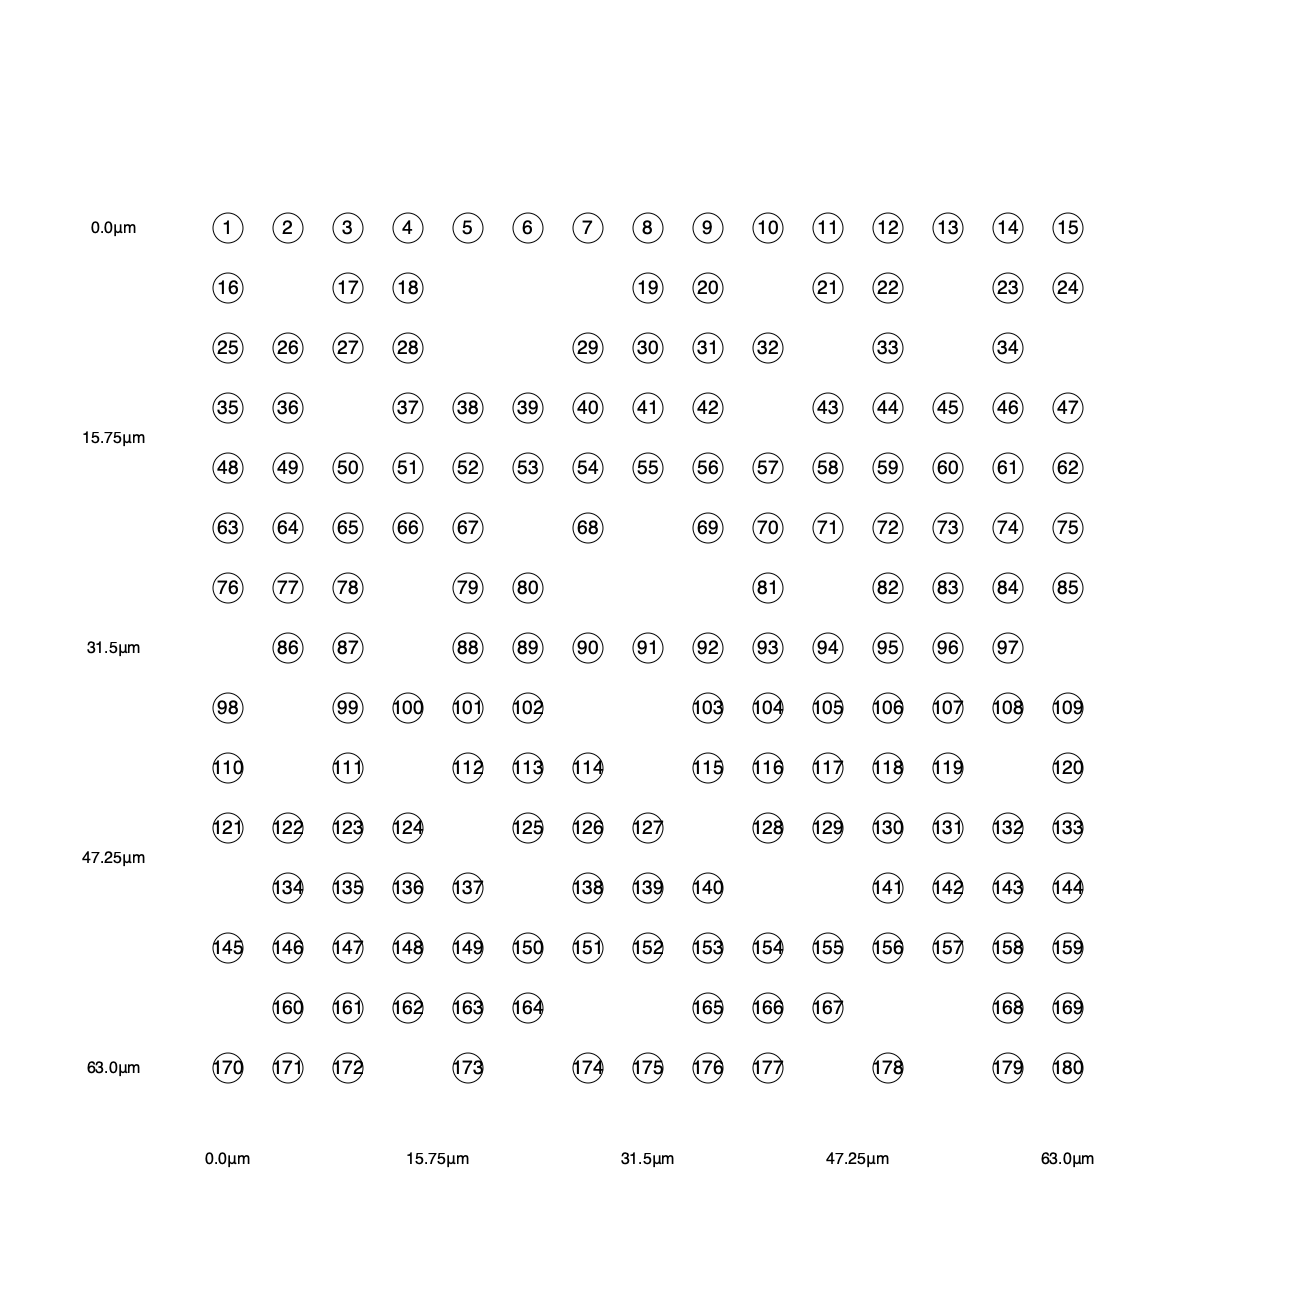

In [83]:
atoms = generate_sites(SquareLattice(), 15,15; scale = a) |> random_dropout(0.2)

In [84]:
a = 4.5
Rb = sqrt(2 * sqrt(2))*a

7.568067737283432

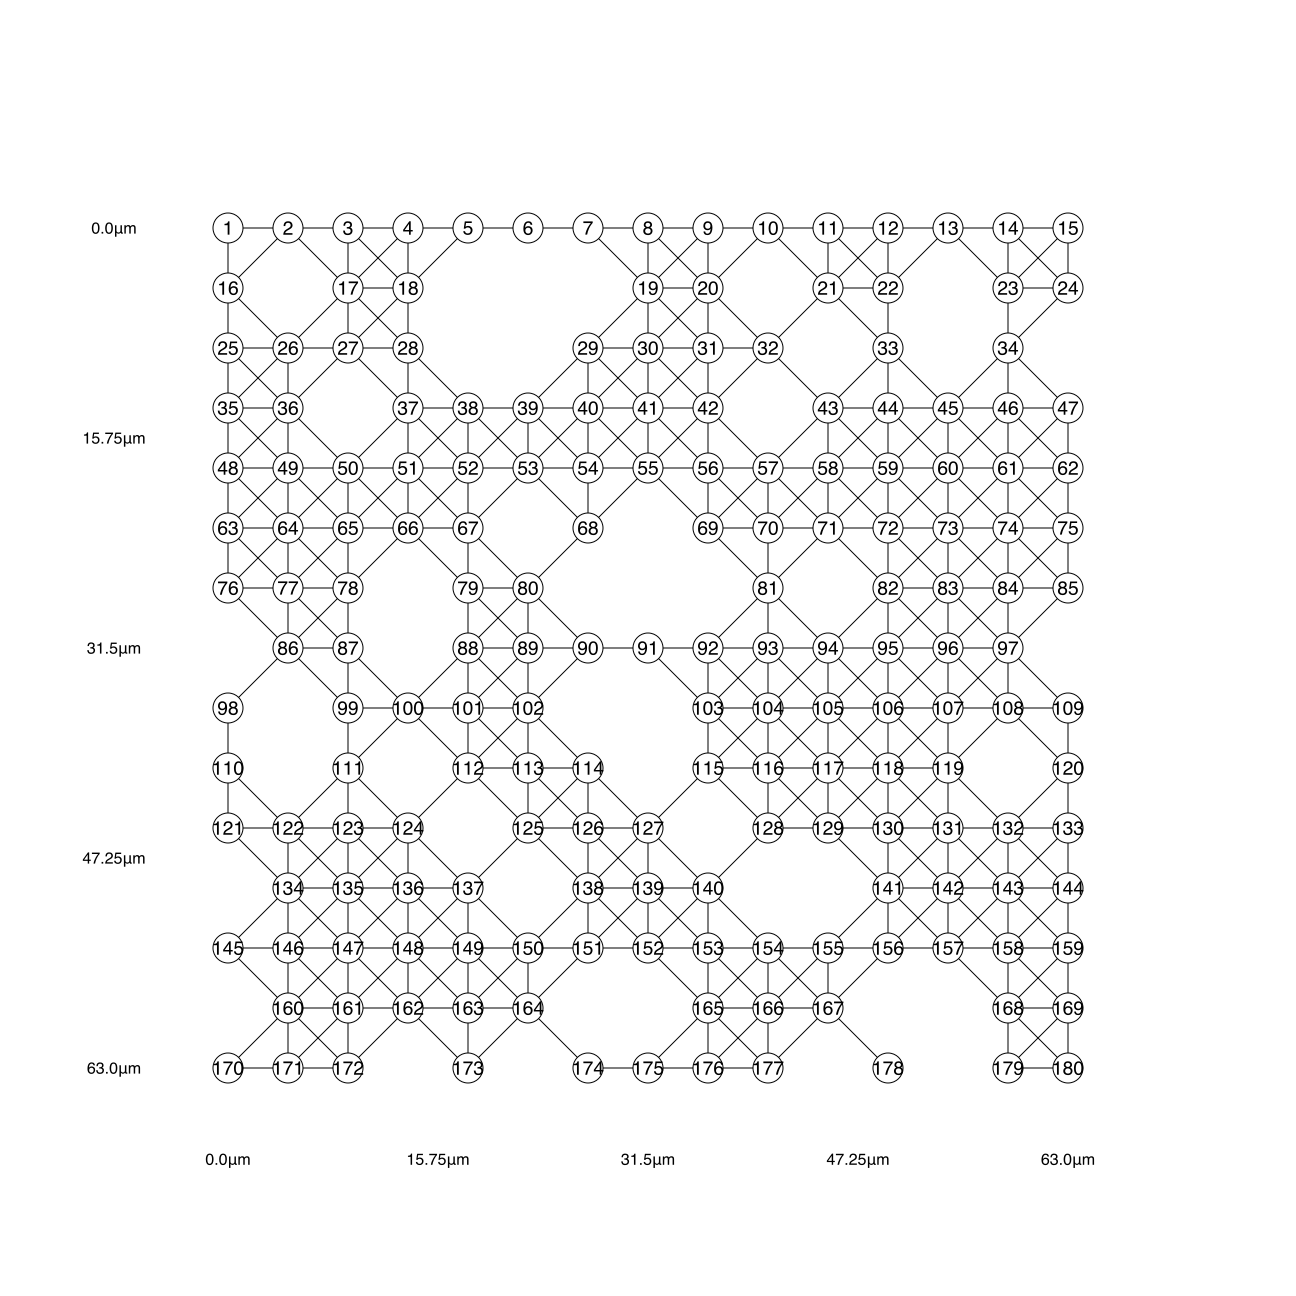

In [85]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [30]:
atoms = AtomList([(0.0, 0.0), (0.0, 4.5), (0.0, 9.0), (0.0, 13.5), (0.0, 18.0), (4.5, 0.0),  
     (4.5, 13.5), (4.5, 18.0), (9.0, 0.0), (9.0, 9.0), (9.0, 13.5), (9.0, 18.0),
    (13.5, 0.0), (13.5, 4.5), (13.5, 9.0), (13.5, 13.5), (13.5, 18.0), (18.0, 0.0),
    (18.0, 13.5), (18.0, 18.0)]);

In [33]:
atoms = AtomList([
    (0.0, 0.0), (0.0, 4.5), (0.0, 9.0), (0.0, 13.5), 
    (4.5, 0.0), (4.5, 4.5), (4.5, 9.0), (4.5, 13.5), 
    (9.0, 0.0), (9.0, 4.5), (9.0, 9.0), (9.0, 13.5),
    (13.5, 0.0), (13.5, 4.5), (13.5, 9.0), (13.5, 13.5)
]);


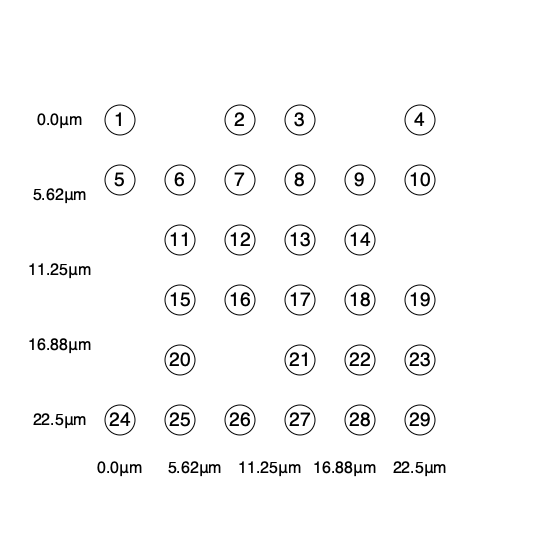

In [36]:
atoms = generate_sites(SquareLattice(), 6,6; scale = a) |> random_dropout(0.2)

In [39]:
a = 4.5
Rb = a

4.5

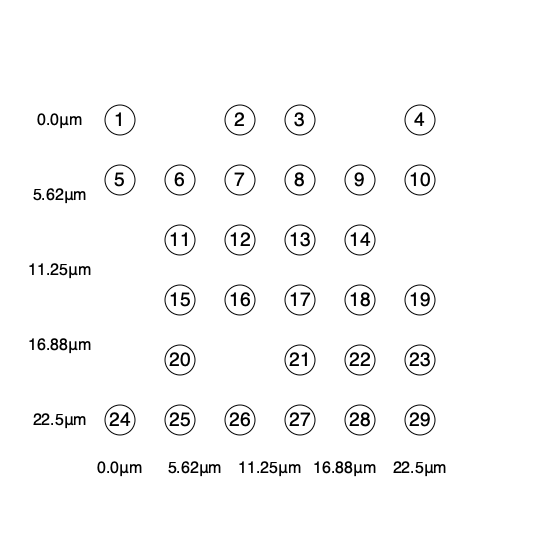

In [40]:
atoms

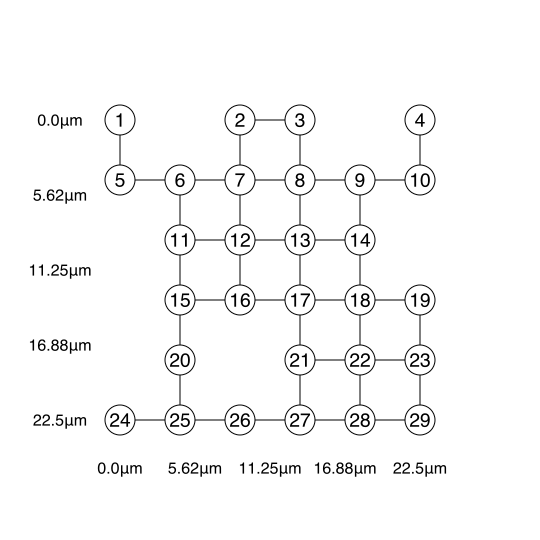

In [41]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [8]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)

{20, 111} undirected simple Int64 graph

In [9]:
get_hardness(graph)

3.25

In [86]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)

{180, 513} undirected simple Int64 graph

In [87]:
get_hardness(graph)

3.271504824222351

# Average hardness?

# Is the kings lattice easier?

In [89]:
function calculate_average_hardness(num_iterations, Rb_factor)
    a = 4.5
    hardness_sum = 0.0
    for _ in 1:num_iterations
        atoms = generate_sites(SquareLattice(), 5, 5; scale = a) |> random_dropout(0.2)
        Rb = Rb_factor * a
        graph = BloqadeMIS.unit_disk_graph(atoms, Rb)
        hardness_sum += get_hardness(graph)
    end
    return hardness_sum / num_iterations
end

Rb_factors = [1, sqrt(2 * sqrt(2)), 2, 3, 4, 5]
average_hardness_array = Float64[]
num_iterations = 6

for Rb_factor in Rb_factors
    average_hardness = calculate_average_hardness(num_iterations, Rb_factor)
    push!(average_hardness_array, average_hardness)
end

println("Average hardness array: ", average_hardness_array)

Average hardness array: [1.4625252525252526, 2.674702380952381, 5.687814129919393, 4.260515873015873, 3.7129629629629632, 5.841666666666666]


# How hard can we go?

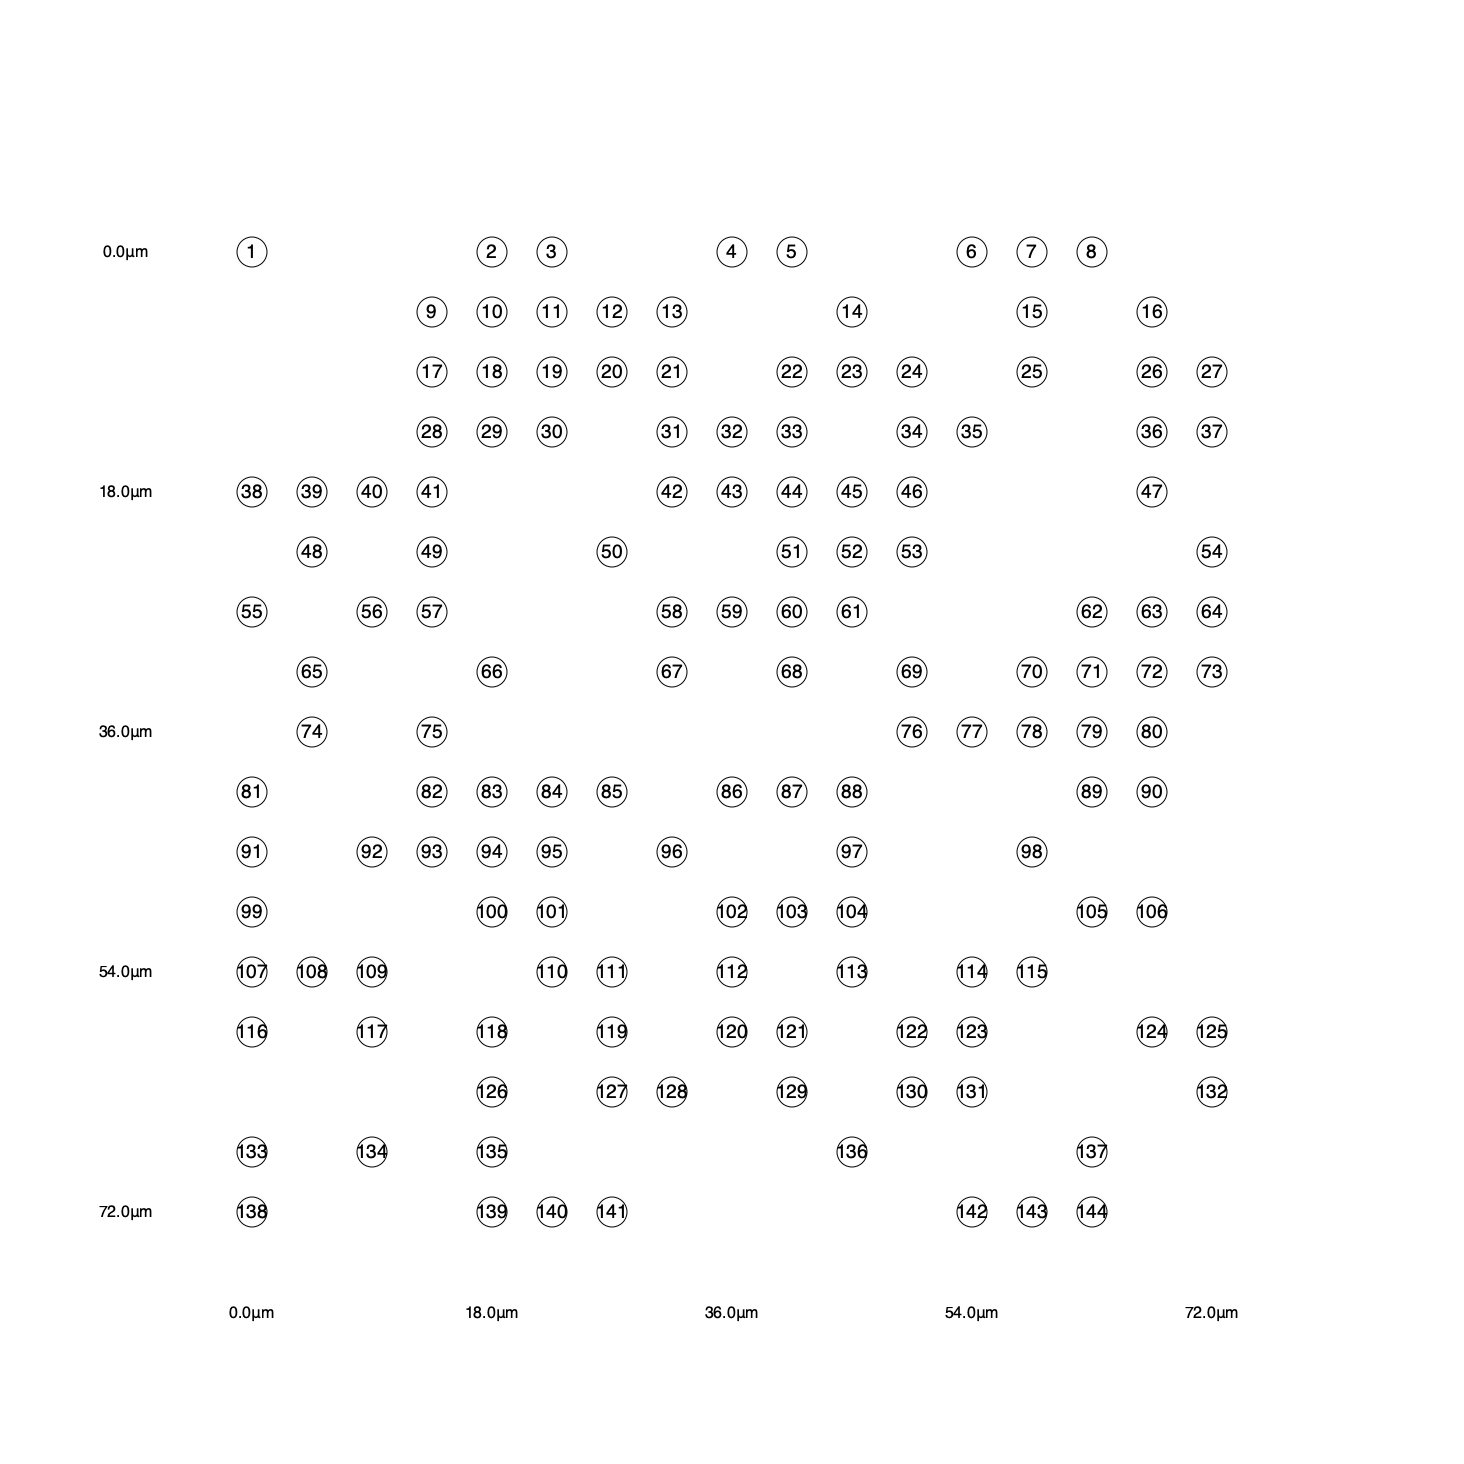

In [90]:
atoms = generate_sites(SquareLattice(), 17,17; scale = a) |> random_dropout(0.5)

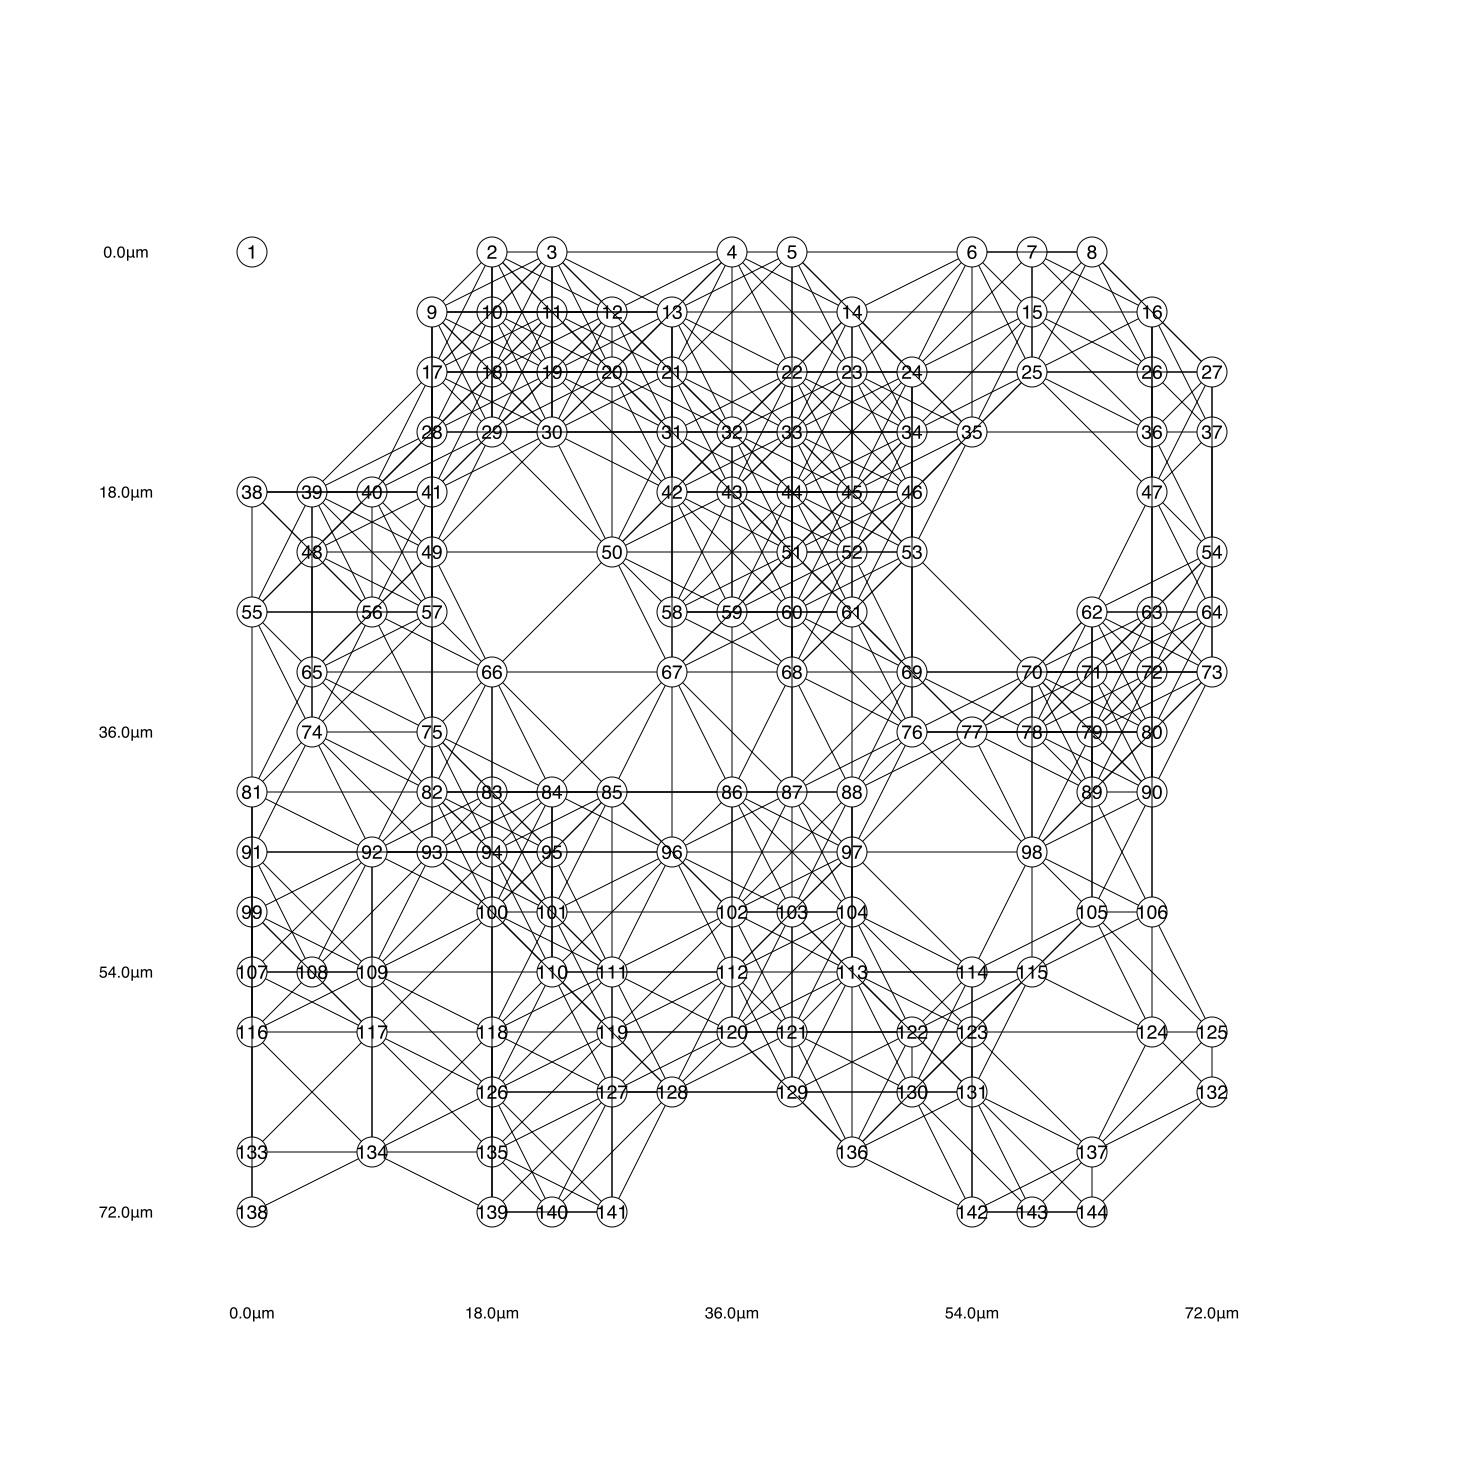

In [94]:
Rb = 3 * a
Bloqade.plot(atoms, blockade_radius = Rb)

In [95]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)
print(get_hardness(graph))

120.97690163281561

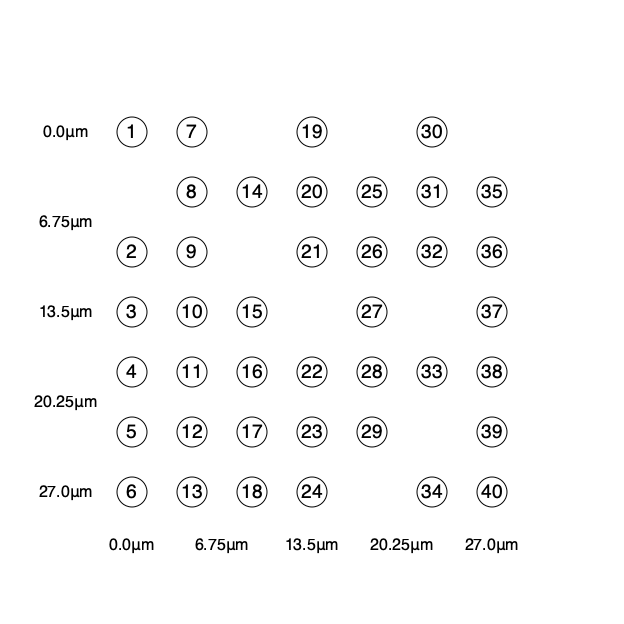

In [131]:
atoms = AtomList([
    (0.0, 0.0), (0.0, 9.0), (0.0, 13.5), (0.0, 18.0), (0.0, 22.5), (0.0, 27.0),
    (4.5, 0.0), (4.5, 4.5), (4.5, 9.0), (4.5, 13.5), (4.5, 18.0), (4.5, 22.5), (4.5, 27.0),
        (9.0, 4.5),  (9.0, 13.5), (9.0, 18.0), (9.0, 22.5), (9.0, 27.0),
    (13.5, 0.0), (13.5, 4.5), (13.5, 9.0), (13.5, 18.0), (13.5, 22.5), (13.5, 27.0),
    (18.0, 4.5), (18.0, 9.0), (18.0, 13.5), (18.0, 18.0), (18.0, 22.5), 
    (22.5, 0.0), (22.5, 4.5), (22.5, 9.0), (22.5, 18.0), (22.5, 27.0),
     (27.0, 4.5), (27.0, 9.0), (27.0, 13.5), (27.0, 18.0), (27.0, 22.5), (27.0, 27.0)
])

In [132]:
a = 4.5
Rb = 2*a

9.0

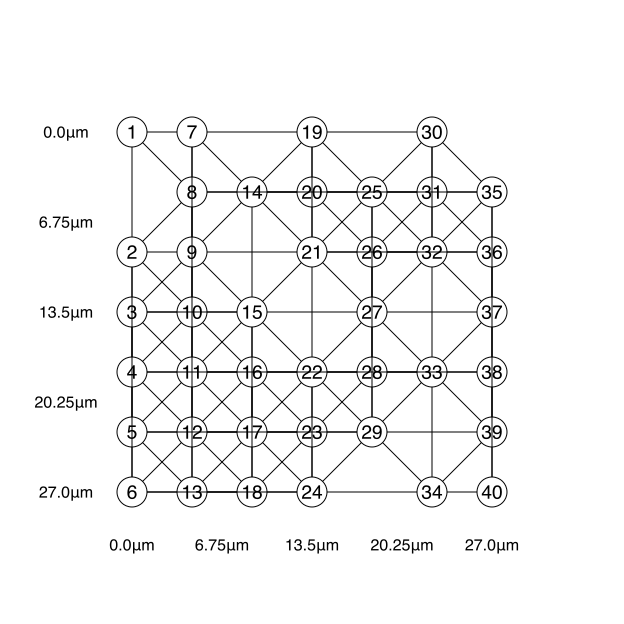

In [133]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [134]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)

{40, 152} undirected simple Int64 graph

In [135]:
get_hardness(graph)

2.638235294117647